In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mne as mne
import os.path as op

### load data

In [2]:
## load data
data_path='/home/despoC/HierarchyThetaBeta/EEG_Experiment/RawEEG/'
fn = 'sub11.bdf'
raw = mne.io.read_raw_edf(data_path+fn)

Extracting edf Parameters from /home/despoC/HierarchyThetaBeta/EEG_Experiment/RawEEG/sub11.bdf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


### check data info

In [3]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | 1-Fp1, 1-AF7, 1-AF3, 1-F1, 1-F3, 1-F5, 1-F7, 1-FT7, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 208.0 Hz
    meas_date : int | 1504169891
    nchan : int | 73
    projs : list | 0 items
    sfreq : float | 1024.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType

In [4]:
events = mne.find_events(raw, verbose=True)

799 events found
Events id: [    1     2     3     4     5     6     7 65536 65791]


<IPython.core.display.Javascript object>


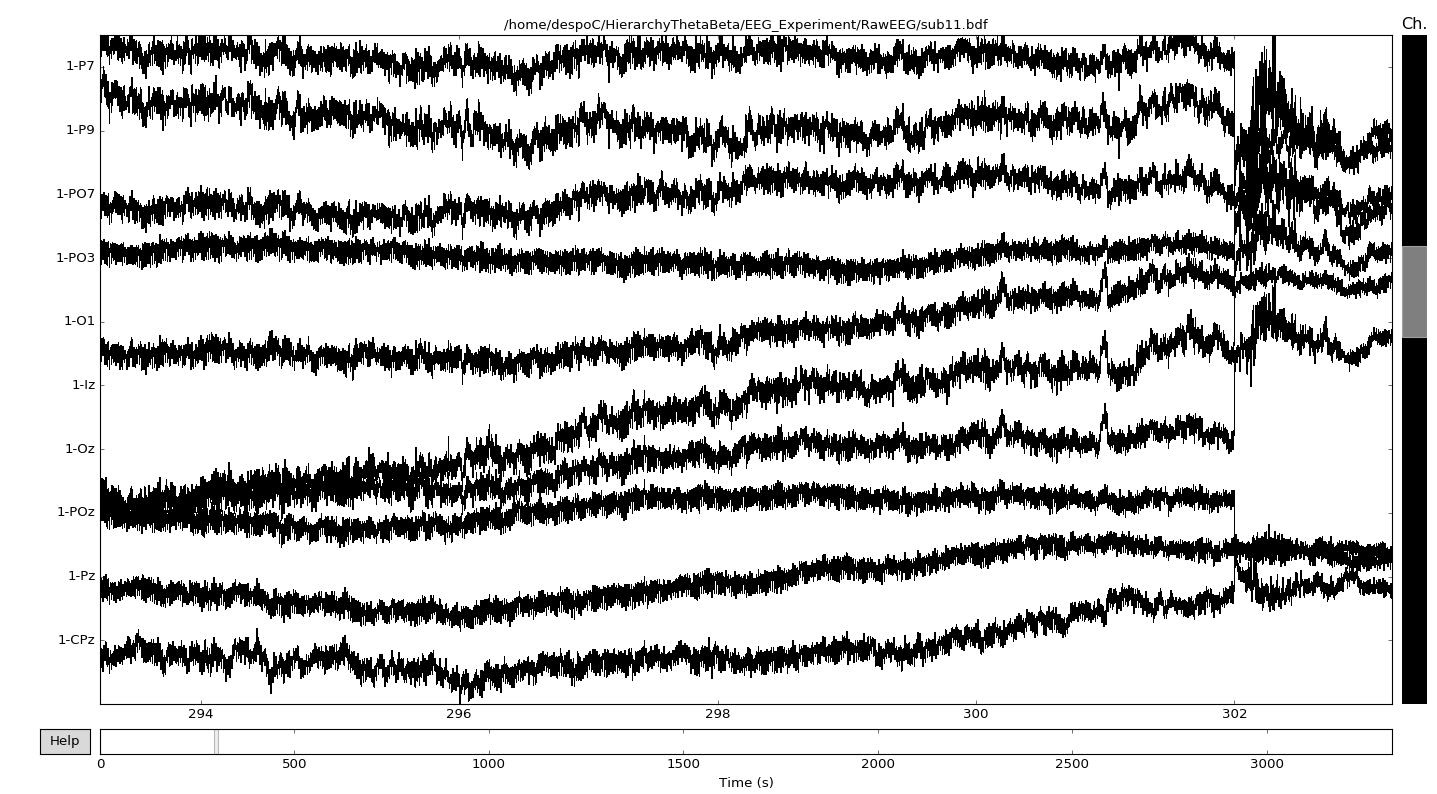

In [6]:
%matplotlib notebook
fig = raw.plot(n_channels=10)

### check events

In [12]:
events = mne.find_events(raw, verbose=True)
# what is this 65536 and 65791??

799 events found
Events id: [    1     2     3     4     5     6     7 65536 65791]


event 6 missing from event_id will be ignored
event 7 missing from event_id will be ignored
event 65536 missing from event_id will be ignored
event 65791 missing from event_id will be ignored


<ipython-input-15-cc2247c44f95>:8: RuntimeWarning: event 6 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-15-cc2247c44f95>:8: RuntimeWarning: event 7 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-15-cc2247c44f95>:8: RuntimeWarning: event 65536 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-15-cc2247c44f95>:8: RuntimeWarning: event 65791 missing from event_id will be ignored
  event_id=event_id);


<IPython.core.display.Javascript object>


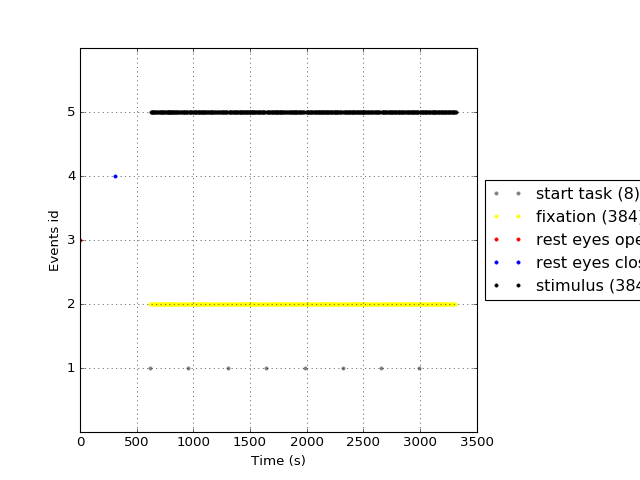

In [15]:
# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
event_id = {'start task': 1, 'fixation': 2,
            'rest eyes open': 3, 'rest eyes closed': 4,
            'stimulus': 5}
color = {1: 'grey', 2: 'yellow', 3: 'red', 4: 'blue', 5: 'black'}
mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, color=color,
                    event_id=event_id);


### epoch-ing, scroll through data

In [17]:
event_id = {'stimulus': 5} #ignorig rest and ITI
tmin, tmax = -0.5, 1  #dont remember the window, making this up
baseline = (None, 0.0)
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax)

384 matching events found
0 projection items activated


<IPython.core.display.Javascript object>


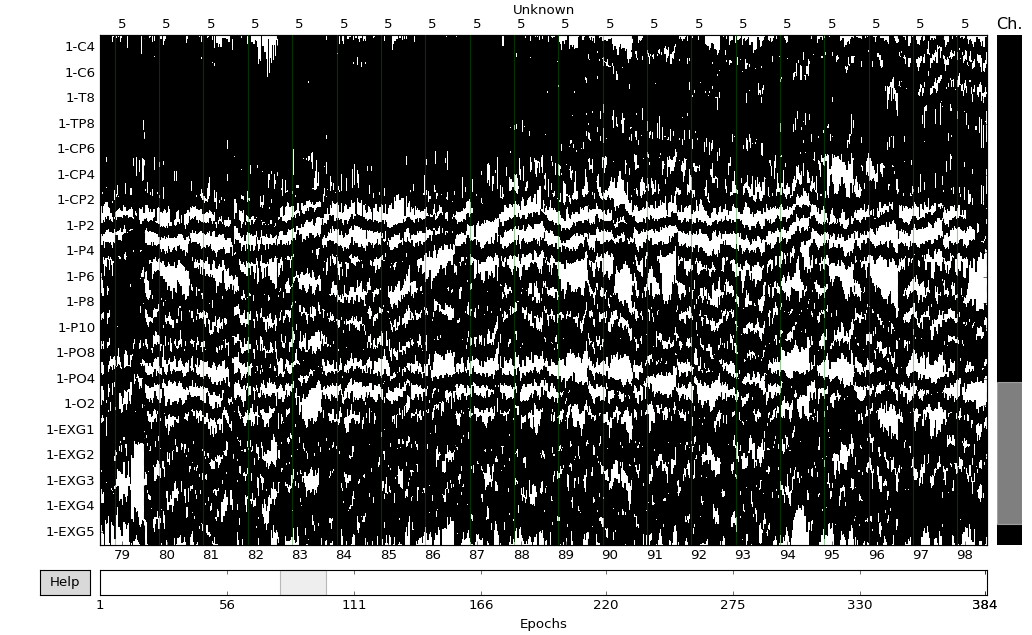

Loading data for 20 events and 1537 original time points ...


In [19]:

epochs.plot(block=True);

<IPython.core.display.Javascript object>


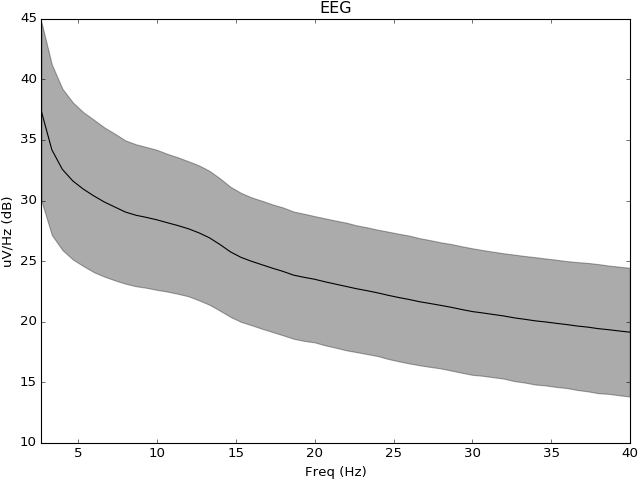

Loading data for 384 events and 1537 original time points ...


In [105]:
epochs.plot_psd(fmin=2., fmax=40.);


### average evoke
   

In [1]:
picks = mne.pick_types(raw.info, eeg=True, exclude = ['1-EXG1','1-EXG2','1-EXG3','1-EXG4','1-EXG5','1-EXG6','1-EXG7','1-EXG8'])
evoked = epochs.average(picks = picks)
layout=mne.channels.read_layout(kind='64.lay', path="/home/despoB/kaihwang/")


NameError: name 'mne' is not defined

<IPython.core.display.Javascript object>


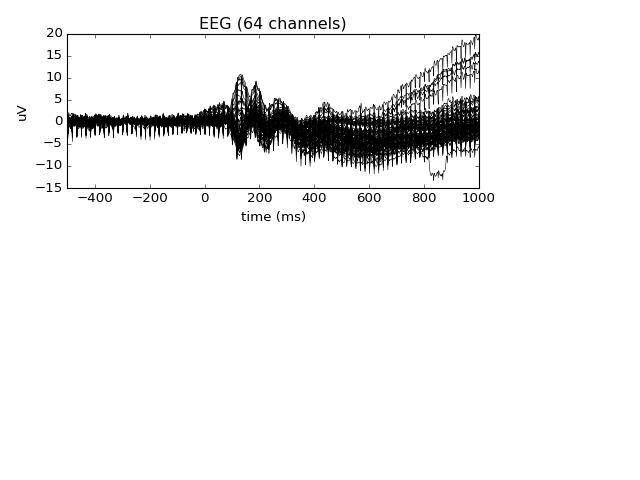

<IPython.core.display.Javascript object>


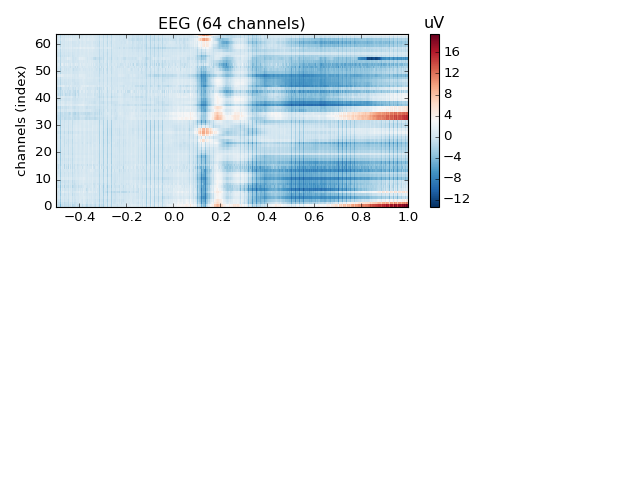

In [101]:
evoked.plot(); #there is def some noise 
evoked.plot_image();


## TFR

In [110]:
freqs = np.logspace(*np.log10([2, 40]), num=15)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, n_jobs=3)

Loading data for 384 events and 1537 original time points ...


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   28.0s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:   30.5s finished


Applying baseline correction (mode: zscore)


<IPython.core.display.Javascript object>


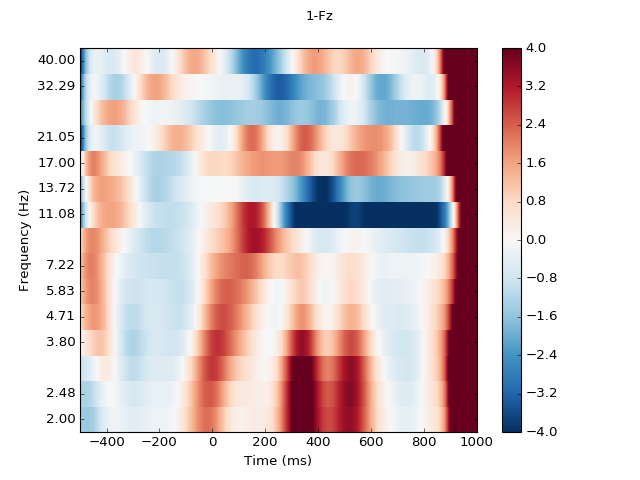

Applying baseline correction (mode: zscore)


<IPython.core.display.Javascript object>


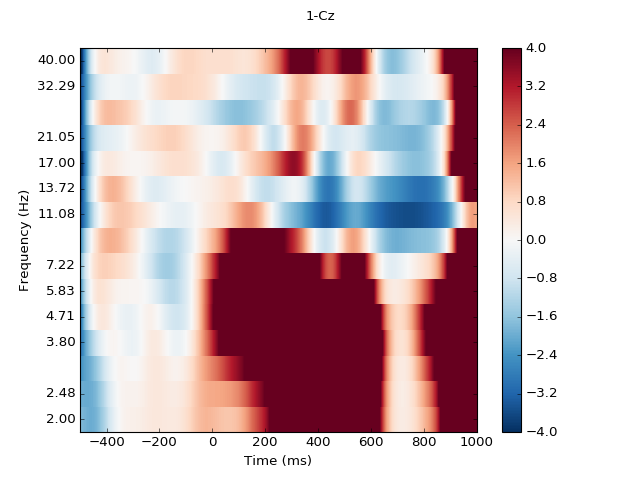

Applying baseline correction (mode: zscore)


<IPython.core.display.Javascript object>


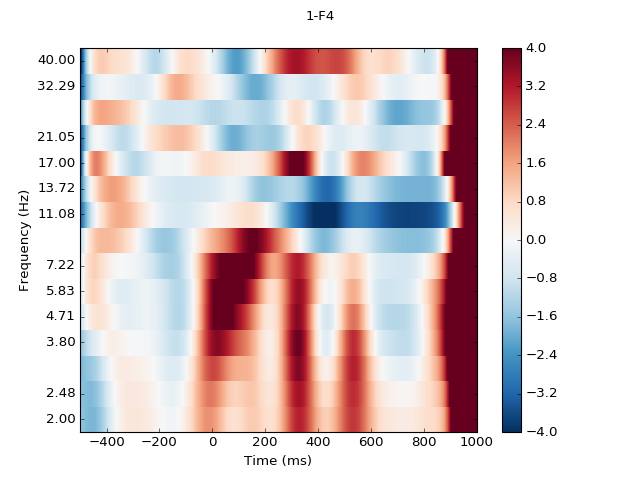

Applying baseline correction (mode: zscore)


<IPython.core.display.Javascript object>


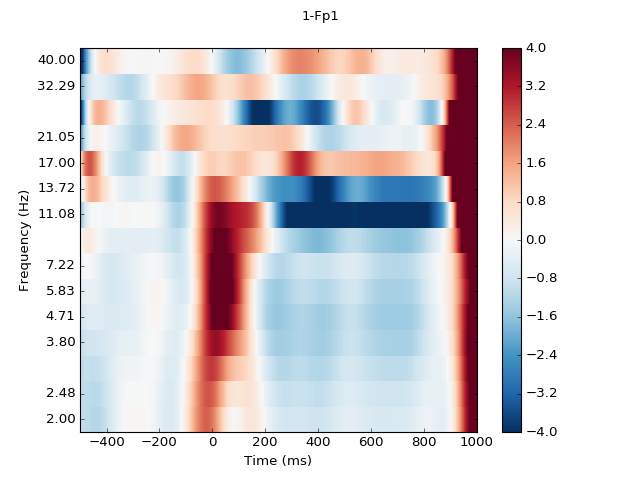

In [123]:
power.plot([37], baseline=(-0.5, 0), mode='zscore', vmin=-4, vmax=4, title = power.ch_names[37]);
power.plot([47], baseline=(-0.5, 0), mode='zscore', vmin=-4, vmax=4, title = power.ch_names[47]);
power.plot([39], baseline=(-0.5, 0), mode='zscore', vmin=-4, vmax=4, title = power.ch_names[39]);
power.plot([0], baseline=(-0.5, 0), mode='zscore', vmin=-4, vmax=4, title = power.ch_names[0]);

<IPython.core.display.Javascript object>


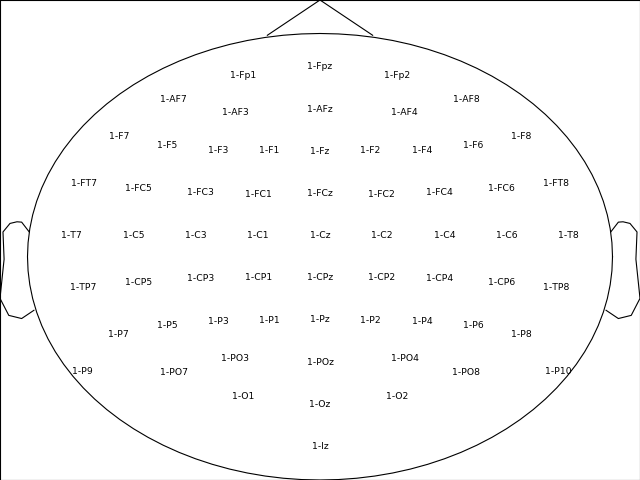

In [119]:
layout.plot();